<a href="https://colab.research.google.com/github/taciya/kaggle.atws/blob/main/atws_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

abnormal_transaction_warning_system_path = kagglehub.competition_download('abnormal-transaction-warning-system')
taciya_functions_path = kagglehub.dataset_download('taciya/functions')

print('Data source import complete.')


In [ ]:
# init
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import sys
sys.path.append("/kaggle/input/functions/")
from FileObject import print_file_info

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path=os.path.join(dirname, filename)
        print_file_info(file_path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Main**

====================1. 数据获取与加载
====================1.1 加载数据
正常交易: 284315 条
异常交易: 492 条
====================2. 数据探索与预处理
====================2.1 处理不平衡数据
====================2.2 特征标准化
====================3. 特征工程
====================3.1 基于领域知识的特征生成
====================3.2 降维（可选）
====================4. 构建最终数据集
====================4.1 分割训练集与测试集
====================4.2 保存数据集
====================5. 验证数据集质量
====================5.1 可视化特征分布


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

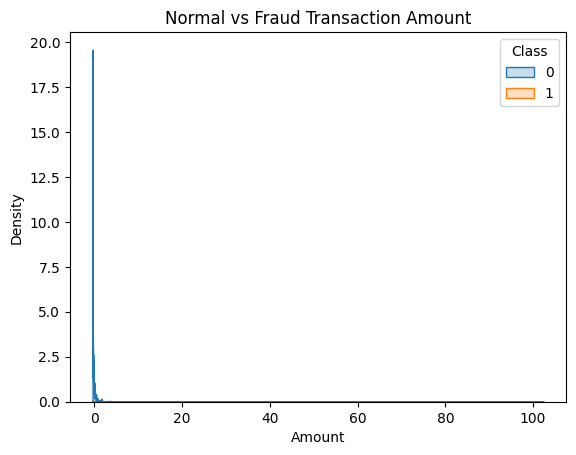

====================5.2 特征相关性分析


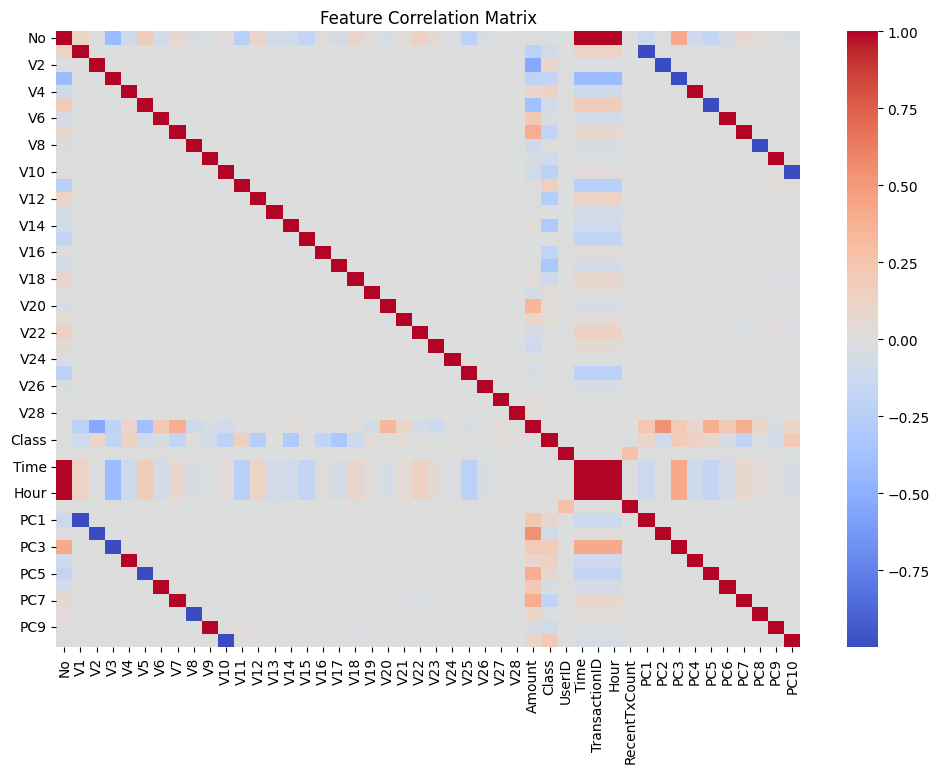

====================6. 扩展：合成数据生成（可选）


In [ ]:
import pandas as pd

print("====================1. 数据获取与加载")
print("====================1.1 加载数据")
# 加载信用卡欺诈数据集（CSV格式）
data = pd.read_csv('/kaggle/input/abnormal-transaction-warning-system/creditcard.csv')
# 查看数据概况
# print(data.head())
print(f"正常交易: {data['Class'].value_counts()[0]} 条")
print(f"异常交易: {data['Class'].value_counts()[1]} 条")

print("====================2. 数据探索与预处理")
print("====================2.1 处理不平衡数据")
from sklearn.utils import resample

# 分离多数类（正常）和少数类（异常）
df_majority = data[data['Class'] == 0]
df_minority = data[data['Class'] == 1]

# 上采样（过采样）少数类（可选方法：SMOTE）
#resample 数据重采样的工具函数，对数组或稀疏矩阵进行  上采样（过采样）​ 和 ​下采样（欠采样）
df_minority_upsampled = resample(df_minority,   #目标数组或稀疏矩阵
                                replace=True,     # 是否允许重复采样（上采样时需设为 True）
                                n_samples=len(df_majority),  # 目标样本数量（下采样时需小于原数据量，上采样时需大于原数据量）
                                random_state=42)  #随机种子（初始化一个伪随机数生成器），42：确保结果可复现
                                                 #stratify  按目标比例分层采样（适用于分类任务）

# 合并数据集
df_balanced = pd.concat([df_majority, df_minority_upsampled])

print("====================2.2 特征标准化")
from sklearn.preprocessing import StandardScaler

# 标准化金额特征（Amount）
scaler = StandardScaler()
# 计算均值和标准差（fit:mean+std） + 标准正态分布（transform）

# print("array_Amount_values 行:%r " % (len(data['Amount'].values.astype(int))))
# print("array_Amount_values.reshape(-1, 1) 行:%r " % (len(data['Amount'].values.reshape(-1, 1).astype(int))))

data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))     #reshape(行，列) 当行/列不定时，可以设位 -1

# 删除无关列（如时间戳Time）
# data.drop(['Time'], axis=1, inplace=True)                                       #<<<<<<<<<<<<<<< 导致下一个命令错误

print("====================3. 特征工程")
print("====================3.1 基于领域知识的特征生成")
# 生成时间窗口特征（如小时段）
data['Hour'] = data['Time']  #   假设Time单位为秒 则 3600 % 24

# 生成交易频率特征（如用户近期交易次数）
# 假设数据中有UserID列（实际需根据数据集调整）
data['RecentTxCount'] = data.groupby('UserID')['TransactionID'].transform('count')   # 分组聚合 *transform 前一个如果是多维注意lammdba是否返回Series

print("====================3.2 降维（可选）")
from sklearn.decomposition import PCA

# 对高维特征（如V1-V28）进行PCA降维
# 若0<n_components<1，则n_components的值为主成分方差的阈值； 通过设置该变量，即可调整主成分数量K；
# 若n_components≥1，则降维后的特征数为n_components；
# whiten：参数为bool型，是否对降维后的数据的每个特征进行归一化，默认是False
pca = PCA(n_components=10)
# fit(X,y=None) ：用训练数据X训练模型，由于PCA是无监督降维，因此y=None。
# transform(X,y=None) ：训练好模型后，对输入数据X进行降维。
# fit_transform(X) ：用训练数据X训练模型，并对X进行降维。相当于先用fit(X)，再用transform(X)。
# inverse_transform(X) ：将降维后的数据还原成原始数据的近似。(PCA的重建)
pca_features = pca.fit_transform(data[['V1', 'V2', 'V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27', 'V28']])

# 将降维结果合并到数据集
data_pca = pd.DataFrame(pca_features, columns=[f'PC{i}' for i in range(1, 11)])
data = pd.concat([data, data_pca], axis=1)  # axis= 0(Y轴：默认)/1(x轴)

print("====================4. 构建最终数据集")
print("====================4.1 分割训练集与测试集")
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

# 分层抽样保持类别比例
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("====================4.2 保存数据集")
# 保存为CSV或Pickle
X_train.to_csv('train_features.csv', index=False)
y_train.to_csv('train_labels.csv', index=False)
X_test.to_csv('test_features.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

print("====================5. 验证数据集质量")
print("====================5.1 可视化特征分布")
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制正常与异常交易的金额分布对比
sns.histplot(data=data, x='Amount', hue='Class', element='step', stat='density')
plt.title('Normal vs Fraud Transaction Amount')
plt.show()
print("====================5.2 特征相关性分析")
# 计算特征相关性矩阵
corr_matrix = data.corr()

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

print("====================6. 扩展：合成数据生成（可选）")
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_synth, y_synth = smote.fit_resample(X_train, y_train)

In [ ]:
# Test 1
# import os

# # 检查文件路径
# file_path = "/kaggle/input/functions/FileObject.py"
# if os.path.exists(file_path):
#     print("文件存在！")
# else:
#     print("文件不存在，请检查数据集上传路径。")

# Test 2
import pandas as pd

d1 = [["xiaolei", 20, 10081], ["xiaowu", 30, 10082]]
t1 = pd.DataFrame(d1)
print(t1)

d2 = [["xiaowang", 22, 10083], ["xiaoming", 25, 10084]]
t2 = pd.DataFrame(d2)
print(t2)

# 默认是上下堆叠
t = pd.concat([t1, t2])
print(t)
# 左右拼接
t = pd.concat([t1, t2], axis=1)
print(t)


**原版SMOTE的局限性**

* 噪声敏感：若少数类样本本身存在异常值，生成的合成样本可能引入噪声。
* 边界模糊：在多数类与少数类交界区域生成样本，可能造成分类边界错误。


**改良算法**

* Borderline SMOTE
1. 原理：仅对边界样本（同时被多数类和少数类近邻包围的样本）生成合成样本，避免噪声干扰。
2. 适用场景：医学影像分类、**金融反欺诈**中的临界样本处理。
* ADASYN（Adaptive Synthetic Sampling）​
1. 原理：根据样本邻域中多数类的密度生成合成样本，密度越高生成越多，解决类别不平衡中的“硬”边界问题。
2. 适用场景：高维数据（如基因表达数据）、复杂分布的非平衡数据。

In [ ]:
# SMOTE + Tomek Links
# ​流程：
#   使用SMOTE生成合成样本；
#   通过Tomek Links移除多数类与少数类邻域重叠的噪声点，清晰分类边界。
# ​优势：
#   减少过采样引入的噪声，提升模型泛化能力。
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

In [ ]:
# 组合采样（SMOTEENN）​
# ​流程：
#   使用SMOTE生成合成样本；
#   通过ENN（Edited Nearest Neighbours）移除多数类噪声点。
# ​优势：
#   同时处理过采样和欠采样，简化流程
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [ ]:
# SMOTE + ADASYN
# ​流程：
#   使用ADASYN生成合成样本（基于邻域密度）；
#   结合SMOTE进一步补充样本多样性。
# ​优势：
#   自适应生成样本，适用于高维、非线性可分数据。
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

* 方差     是各数据偏离平均值 差值的平方和 的平均数
* 标准差   是方差的平方根
* 均方误差（MSE）是各数据偏离真实值 差值的平方和 的平均数

In [ ]:
# StandardScaler原理
from sklearn.preprocessing import StandardScaler  # 标准化工具
import numpy as np

x_np = np.array([[1.5, -1., 2.],
                [2., 0., 0.]])
scaler = StandardScaler()
x_train = scaler.fit_transform(x_np)
print('矩阵初值为：{}'.format(x_np))
print('该矩阵的均值为：{}\n 该矩阵的标准差为：{}'.format(scaler.mean_,np.sqrt(scaler.var_)))
print('标准差标准化的矩阵为：{}'.format(x_train))




In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 创建一个 3 x 2 的矩阵
X = np.array([[1, 2], [3, 4], [5, 6]])

# 使用 fit_transform 方法标准化数据
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X)

# 使用 fit 和 transform 方法标准化数据
scaler = StandardScaler()
scaler.fit(X)
X_scaled2 = scaler.transform(X)

# 打印结果
print("使用 fit_transform 方法标准化的结果：\n", X_scaled1)
print("使用 fit 和 transform 方法标准化的结果：\n", X_scaled2)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 创建一个 3 x 2 的矩阵
X = np.array([[1, 2], [3, 4], [5, 6]])

# 创建 StandardScaler 对象
scaler = StandardScaler()

# 计算均值和标准差
scaler.fit(X)

# 将数据标准化为标准正态分布
X_scaled = scaler.transform(X)

# 打印结果
print("原始数据：\n", X)
print("均值：", scaler.mean_)
print("标准差：", scaler.scale_)
print("标准化后的数据：\n", X_scaled)

In [ ]:
import pandas as pd

# 创建一个DataFrame
df = pd.DataFrame({
'Weight': [45, 88, 56, 15, 71],
'Name': ['Sam', 'Andrea', 'Alex', 'Robin', 'Kia'],
'Age': [14, 25, 55, 8, 21]
})
print(df)
# 使用.values属性获取NumPy数组
data_array = df.values

# 输出NumPy数组
print(data_array)

# 输出NumPy数组 行 +列
print(len(data_array))
print(len(data_array[0]))

In [ ]:
#DataFrame.transform
import pandas as pd

# ​1. 按列进行特征工程

# 创建示例数据
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})

# 定义函数：将每列乘以 100
def multiply_by_100(col):
    return col + 10

# 对每列应用函数
df_transformed = df.transform(multiply_by_100)
print(df_transformed)

# # ​2. 生成新特征（基于多列计算）​

# # 创建新列 "C" = A + B
# df['C'] = df.import pandas as pd

# # 创建示例数据
# df = pd.DataFrame({
#     'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
#     'Value': [10, 20, 30, 40, 50, 60]
# })

# # 使用 lambda 按列生成新特征（例如：分类标签编码）
# df['Encoded_Category'] = df['Category'].transform(
#     lambda x: {'A': 0, 'B': 1, 'C': 2}[x]
# )

# print(df)(lambda x:x['A']+x['B'], axis=0)

# print(df['C'] )
# sys.exit()
# # ​3. 标准化数据（Z-Score）
# from sklearn.preprocessing import StandardScaler

# # 对数值列标准化
# df[['A', 'B']] = df[['A', 'B']].transform(
#     lambda x: (x - x.mean()) / x.std(),
#     axis=0
# )

# ​4. 分组聚合（GroupBy + Transform）​

# 按某列分组，计算每组的统计量（如均值、中位数）
df = pd.DataFrame({
    'Group': ['A', 'A', 'A', 'B', 'B', 'B'],
    'Value': [1, 2, 3, 4, 5, 6]
})

# 计算每组内的均值并填充到原数据
df['Group_Mean'] = df.groupby('Group')['Value'].transform('mean')   # 优先使用python内置函数 mean()、std()
print(df)

In [ ]:
import pandas as pd

# 测试数据
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
def complex_func(x):
    x['C'] = x['A'] + x['B']
    return x['C']  # 返回 Series，但索引可能错乱


# df['C'] = df.transform(lambda x:x['A']+x['B'] if x['A'] % 2 == 1 else x['A'] * x['B'] )
print(df)
